In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

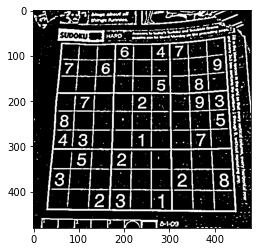

In [2]:
sudo_org = cv2.imread('sudoku.jpg')
sudo_org = cv2.resize(sudo_org, (480, 480))
sudo_img = cv2.cvtColor(sudo_org, cv2.COLOR_BGR2GRAY)
sudo_img = cv2.GaussianBlur(sudo_img, (3, 3), 1)
sudo_img = cv2.adaptiveThreshold(sudo_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                 cv2.THRESH_BINARY_INV, 15, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
morph = cv2.morphologyEx(sudo_img, cv2.MORPH_OPEN, kernel)
plt.imshow(sudo_img, cmap='gray')

In [3]:
contours, _ = cv2.findContours(sudo_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [4]:
contours = sorted(contours, key=cv2.contourArea, reverse=True)

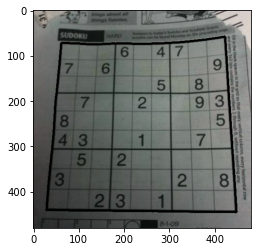

In [5]:
temp = cv2.drawContours(sudo_org, contours, 0, 1, 3)
plt.imshow(temp, cmap='gray')

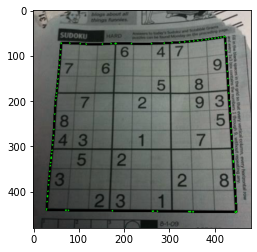

In [6]:
first = contours[0]
area = cv2.contourArea(first)
perimeter = cv2.arcLength(first, closed=True)
corners = cv2.approxPolyDP(first, 0.02 * perimeter, True)
if len(corners) == 4 and area > 1000:
    poly_coords = first
    
temp = cv2.drawContours(sudo_org, poly_coords, -1, (0,255,0), 2)
plt.imshow(temp)

In [10]:
def find_corners(contours):
    result = np.zeros((4, 2), dtype = "float32")
    sum_cnt = contours.sum(axis = 1)
    result[0] = contours[np.argmin(sum_cnt)]
    result[2] = contours[np.argmax(sum_cnt)]
    diff = np.diff(contours, axis = 1)
    result[1] = contours[np.argmin(diff)]
    result[3] = contours[np.argmax(diff)]
    return result

In [11]:
find_corners(poly_coords)

IndexError: index 238 is out of bounds for axis 0 with size 203

In [12]:
poly_coords

array([[[420,  58]],

       [[419,  59]],

       [[414,  59]],

       [[413,  60]],

       [[408,  60]],

       [[407,  61]],

       [[401,  61]],

       [[400,  62]],

       [[394,  62]],

       [[393,  63]],

       [[387,  63]],

       [[386,  64]],

       [[381,  64]],

       [[380,  65]],

       [[372,  65]],

       [[371,  66]],

       [[363,  66]],

       [[362,  67]],

       [[354,  67]],

       [[353,  68]],

       [[345,  68]],

       [[344,  69]],

       [[334,  69]],

       [[333,  70]],

       [[323,  70]],

       [[322,  71]],

       [[306,  71]],

       [[305,  72]],

       [[289,  72]],

       [[288,  73]],

       [[261,  73]],

       [[260,  74]],

       [[217,  74]],

       [[216,  73]],

       [[183,  73]],

       [[182,  74]],

       [[181,  74]],

       [[180,  73]],

       [[172,  73]],

       [[171,  74]],

       [[153,  74]],

       [[152,  75]],

       [[117,  75]],

       [[116,  74]],

       [[104,  74]],

       [[1